# Free space loss

https://en.wikipedia.org/wiki/Free-space_path_loss#Free-space_path_loss_in_decibels

In [3]:
%matplotlib notebook
%pylab inline

import numpy

def free_space_path_loss(frequency, distance, transmitter_gain=0, receiver_gain=0):
    return 20 * numpy.log10(distance) + 20 * numpy.log10(frequency) - 147.55 - transmitter_gain - receiver_gain

Populating the interactive namespace from numpy and matplotlib


## Free space loss for 1GHz to 5GHz without antenna gain

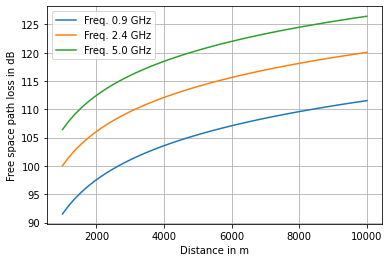

In [4]:
distances = linspace(1000, 10000)

for frequency in [900*1e6, 2.4*1e9, 5*1e9]:
    plot(distances, free_space_path_loss(frequency, distances), label='Freq. {} GHz'.format(frequency/10**9))

xlabel("Distance in m")
ylabel("Free space path loss in dB")
legend(loc='upper left')
grid()


## Free space path loss with antenna gain

Sum of antenna gain: 14 dbi


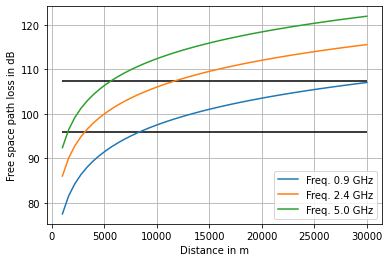

In [5]:
min_distance = 1000
max_distance = 30000

distances = linspace(min_distance, max_distance)

tx_antenna_gain = 1 # dBi e.g. omni
rx_antenna_gain = 13 # dBi e.g. sector

sensitivity = 96 # dBm +- 2 dBm tolerance e.g. sector as receiver

hlines(96, min_distance, max_distance)
hlines(107.5, min_distance, max_distance)

print(f'Sum of antenna gain: {tx_antenna_gain + rx_antenna_gain} dbi')

for frequency in [900*1e6, 2.4*1e9, 5*1e9]:
    plot(distances, free_space_path_loss(frequency, distances, tx_antenna_gain, rx_antenna_gain), label='Freq. {} GHz'.format(frequency/10**9))

xlabel("Distance in m")
ylabel("Free space path loss in dB")
legend(loc='lower right')
grid()